# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import your libraries
from scipy import stats
from scipy.stats import binom
from scipy.stats import norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
"""numpy.random.normal(loc = 0.0, scale = 1.0, size = None) : 
creates an array of specified shape and fills it with random values which is actually a part of Normal(Gaussian)Distribution.
This is Distribution is also known as Bell Curve because of its characteristics shape."""
"""
Parameters :

loc   : [float or array_like]Mean of the distribution. 
scale : [float or array_like]Standard Derivation of the distribution. 
size  : [int or int tuples]. 

Output shape given as (m, n, k) then
m*n*k samples are drawn. If size is 
None(by default), then a single value
is returned. 

"""

'\nParameters :\n\nloc   : [float or array_like]Mean of the distribution. \nscale : [float or array_like]Standard Derivation of the distribution. \nsize  : [int or int tuples]. \n\nOutput shape given as (m, n, k) then\nm*n*k samples are drawn. If size is \nNone(by default), then a single value\nis returned. \n\n'

In [3]:
# Your code here
mean=50 #mu
standard_deviation=5 #sigma
sample_size=[10, 50, 500, 5000]
arrays=[]
for x in sample_size:
    a = np.random.normal(50, 5, size=x)
    n = stats.normaltest(a)
    arrays.append(a)
    print(n)

NormaltestResult(statistic=2.0932179341200747, pvalue=0.35112641380684834)
NormaltestResult(statistic=2.149385828421834, pvalue=0.34140257908561616)
NormaltestResult(statistic=0.6639908363988599, pvalue=0.7174906102457994)
NormaltestResult(statistic=4.818490276742186, pvalue=0.08988311828734866)


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [4]:
"""
Each test will return at least two things:
    Statistic: A quantity calculated by the test that can be interpreted in the context of the test via comparing it to critical values from the distribution of the test statistic.
    p-value: Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution.

The tests assume that that the sample was drawn from a Gaussian distribution. 
Technically this is called the null hypothesis, or H0.
A threshold level is chosen called alpha, typically 5% (or 0.05), that is used to interpret the p-value.

In the SciPy implementation of these tests, you can interpret the p value as follows.

    p <= alpha: reject H0, not normal.
    p > alpha: fail to reject H0, normal.

This means that, in general, we are seeking results with a larger p-value to confirm that our sample was likely drawn from a Gaussian distribution.

A result above 5% does not mean that the null hypothesis is true. 
It means that it is very likely true given available evidence. 
The p-value is not the probability of the data fitting a Gaussian distribution; 
it can be thought of as a value that helps us interpret the statistical test.
"""

'\nEach test will return at least two things:\n    Statistic: A quantity calculated by the test that can be interpreted in the context of the test via comparing it to critical values from the distribution of the test statistic.\n    p-value: Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution.\n\nThe tests assume that that the sample was drawn from a Gaussian distribution. \nTechnically this is called the null hypothesis, or H0.\nA threshold level is chosen called alpha, typically 5% (or 0.05), that is used to interpret the p-value.\n\nIn the SciPy implementation of these tests, you can interpret the p value as follows.\n\n    p <= alpha: reject H0, not normal.\n    p > alpha: fail to reject H0, normal.\n\nThis means that, in general, we are seeking results with a larger p-value to confirm that our sample was likely drawn from a Gaussian distribution.\n\nA result above 5% does not mean that the null hypothesis is true. \nIt means that it i

In [5]:
# elements déjà présents dans le lab
"""
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 50000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: stats.normaltest(d))

tests"""

'\nmu, sigma = 50, 5\n\nsample_size = pd.Series([10, 50, 500, 5000, 50000])\n\ndists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))\n\ntests = dists.apply(lambda d: stats.normaltest(d))\n\ntests'

#### Interpret the normaltest results and make your observations.

In [6]:
# Explain the test results here
    #the normaltest results show 4 pvalue for each series created. 
    #each pvalue are greatest than alpha (0.05). So the 4 distributions are normal.

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


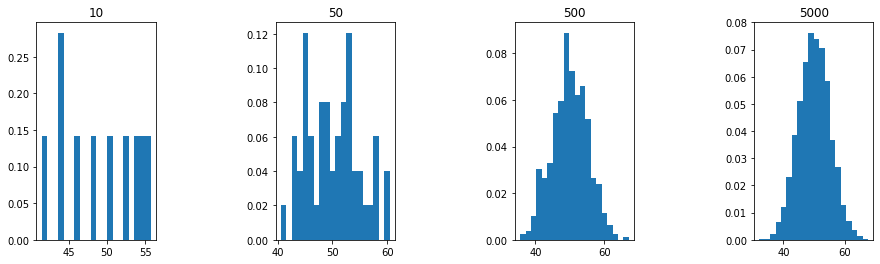

In [7]:
# Your code here
df = pd.DataFrame(arrays)
df = df.pivot_table(columns = df.index)
df.head(2)

f, ax = plt.subplots(1, 4,sharey=False)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):    
    ax[i].set_title(sample_size[i])
    ax[i].hist(df[i], 20, density=True)

In [8]:
# elements déjà présents dans le lab
"""f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)"""

"f, ax = plt.subplots(1, 4)\n\nf.set_figwidth(15)\n\nf.subplots_adjust(wspace=1)\n\nfor i in range(0, 4):\n    ax[i].set_title('n=%s' % (sample_size[i]))\n    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)"

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [9]:
# Your comment and explanation here
#A faire

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

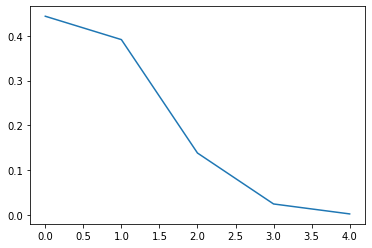

In [10]:
# Your code here

fig, ax = plt.subplots(1, 1)

#Calculate a few first moments:
n, p = 5, 0.15 #avec n=sample de 5 personnes et P=prob_click sur l'ad
discre_dist= binom(n, p)


#Display the probability mass function (pmf):
    #on veut maintenant la probabilité qu'entre 0 et 5 personnes cliquent sur la pub pour cela on utilise le .pmf sur la distribution binomiale

x = range(n)
ax.plot(x, discre_dist.pmf(x))

In [11]:
# elements déjà présents dans le lab
"""from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()"""

'from scipy.stats import binom\n\nn, p = 5, 0.15\n\nx = range(n)\n\ndist = binom(n, p)\n\nfig, ax = plt.subplots(1, 1)\n\nplt.plot(x, dist.pmf(x))\n\nplt.show()'

#### Explain what you observe from the plot above

In [12]:
# Your comment here
    #A faire

#### Now plot PMP with 50, 500, and 5000 visitors.

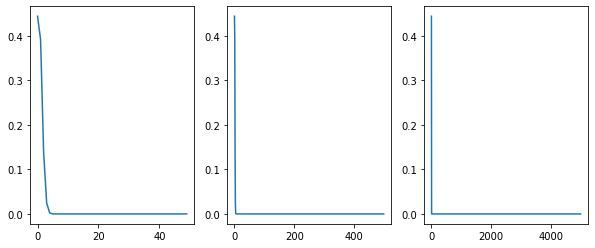

In [13]:
# Your code here
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(10)
#fig.subplots_adjust(wspace=1)

liste_visiteurs=[50,500,5000]

for a, i in zip(liste_visiteurs,range(3)):
    x = range(a)
    ax[i].plot(x, discre_dist.pmf(x))

#### What did you notice from the distribution plots? Comment your findings.

In [14]:
# Your comment here
    #A faire

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [28]:
# Your comment here
    #Loi poisson : comptagedes éléments dans une période connue fixe (par heure, par jour, etc...) par ex nb de voiture qui passe par heure. 
    #il y a un seul param => Lambda : nb d'élément par tps fixe. Par ex si 3 voitures par heure c'est 3

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [29]:
# Your code here
from scipy.stats import poisson
mu = 300 #visits per day
#proba for 320
prob = poisson.pmf(320, mu)
prob

0.011612348610402475

#### What is the probability of getting 60 visits?

In [30]:
# Your code here
prob1 = poisson.pmf(60, mu)
prob1

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

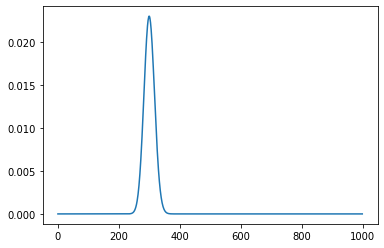

In [31]:
# your code here
fig, ax = plt.subplots(1, 1)

#Display the probability mass function (pmf):
    #on veut maintenant la probabilité qu'entre 0 et 5 personnes cliquent sur la pub pour cela on utilise le .pmf sur la distribution binomiale

x = range(0,1000)
ax.plot(x, poisson.pmf(x,mu))

In [32]:
# elements déjà présents dans le lab
"""from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)"""

'from scipy.stats import poisson\n\nN = np.arange(1000)\n\nrv = poisson(300)\n\narr = []\n\nfor n in N:\n    arr.append(rv.pmf(n))\n\nplt.plot(arr)'